In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the data

In [2]:
data = pd.read_csv('churn_prediction.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [3]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

### Segregating variables - Dependent & Independent 

In [4]:
#seperating independent and dependent variables

data_x = data.drop(['churn'], axis=1)
data_y = data['churn']

#### Scaling the data

In [5]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y, random_state = 56)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

### Implementing Decesion Tree

Q1: __Fill the correct values to implement Decision Tree and find out accuracy, precision, and recall for Test Set__?

In [6]:
#importing Decision tree and metric accuracy score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score

# Creating instance of Tree

tree =  DecisionTreeClassifier()

# Fitting the model
tree.fit(train_x, train_y)

# Predicting over the Test Set and accuracy-score
test_predict = tree.predict(test_x)
k = accuracy_score(test_y, test_predict)
print('Test accuracy_score    ', k)
k = precision_score(test_y, test_predict)
print('Test precision_score    ', k)
k = recall_score(test_y, test_predict)
print('Test recall_score    ', k)

Test accuracy_score     0.7674460757658148
Test precision_score     0.42857142857142855
Test recall_score     0.47382671480144406


Q2: __Fill the correct values for getting Train and Test set accuracy by implementing Decision Tree with the depth range as 3-30?__

In [7]:
dp_list = [i for i in range(3, 30)]
train = []
test = []

for depth in dp_list:
    tree = DecisionTreeClassifier()
    tree.fit(train_x, train_y)
    prediction = tree.predict(test_x)
    trainpred = tree.predict(train_x)
    train_acc = accuracy_score(train_y, trainpred)
    test_acc = accuracy_score(test_y, prediction)
    train.append(train_acc)
    test.append(test_acc)
    
performance = pd.DataFrame({'max_depth': dp_list,'Train_acc': train,'Test_acc': test})


performance

,max_depth,Train_acc,Test_acc
0,3,1.0,0.771615
1,4,1.0,0.771434
2,5,1.0,0.767627
3,6,1.0,0.768896
4,7,1.0,0.771978
5,8,1.0,0.773609
6,9,1.0,0.772340
7,10,1.0,0.765996
8,11,1.0,0.769621
9,12,1.0,0.773428


Q3: __Plot the train and test set accuracy after implementing Decision Tree with the depth range as 3-30?__

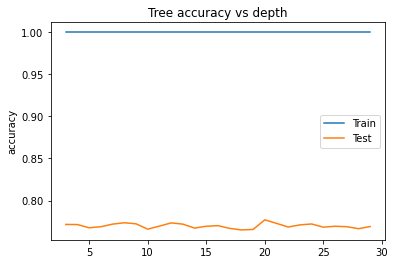

In [8]:
plt.plot(range(3, 30), train, label='Train')
plt.plot(range(3, 30), test, label='Test')
plt.legend()
plt.ylabel('accuracy')
plt.title('Tree accuracy vs depth')
plt.show()

Q4: __Implement Decision Tree with the mimimum sample leaf as 1-30 and plot the Train and Test set accuracy  ?__

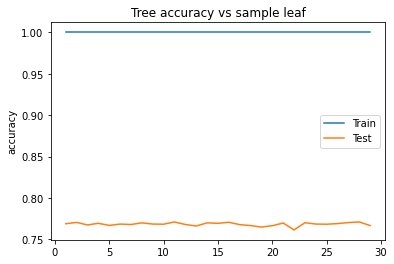

In [9]:
sam_list = [i for i in range(1, 30)]
train = []
test = []

for sam in sam_list:
    tree = DecisionTreeClassifier()
    tree.fit(train_x, train_y)
    prediction = tree.predict(test_x)
    trainpred = tree.predict(train_x)
    train_acc = accuracy_score(train_y, trainpred)
    test_acc = accuracy_score(test_y, prediction)
    train.append(train_acc)
    test.append(test_acc)
    
performance = pd.DataFrame({'min_samples_leaf': sam_list,'Train_acc': train,'Test_acc': test})

plt.plot( range(1, 30), train, label='Train')
plt.plot( range(1, 30), test, label='Test')
plt.legend()
plt.ylabel('accuracy')
plt.title('Tree accuracy vs sample leaf')
plt.show()



Q5: __Implement Decision Tree with the mimimum sample split as all even numbers between 2 and 40 and plot the Train and Test set accuracy  ?__

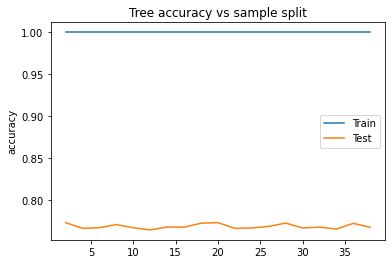

In [10]:
sam_list = [i for i in range(2, 40, 2)]
train = []
test = []

for sam in sam_list:
    tree = DecisionTreeClassifier()
    tree.fit(train_x, train_y)
    prediction = tree.predict(test_x)
    trainpred = tree.predict(train_x)
    train_acc = accuracy_score(train_y, trainpred)
    test_acc = accuracy_score(test_y, prediction)
    train.append(train_acc)
    test.append(test_acc)
    
performance = pd.DataFrame({'min_samples_split':sam_list,'Train_acc':train,'Test_acc':test})

plt.plot(range(2, 40, 2), train, label='Train')
plt.plot(range(2, 40, 2), test, label='Test')
plt.legend()
plt.ylabel('accuracy')
plt.title('Tree accuracy vs sample split')
plt.show()




Q6: __Implement a cross validation Decision Tree model with stratified 5 folds and make predictions for test dataset.__

In [11]:
# a cross validation Decision Tree model with stratified 5 folds and make predictions for test dataset.

from sklearn.model_selection import StratifiedKFold


i=1 
kf = StratifiedKFold(n_splits=5,random_state=3,shuffle=True) 
accuracy_list = []
for train_index,test_index in kf.split(data_x, data_y):
    print('\n{} of kfold {}'.format(test_index, i))   
    xtr,xvl = data_x.loc[train_index],data_x.loc[test_index]     
    ytr,yvl = data_y[train_index],data_y[test_index]         
    model = DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl, pred_test) 
    accuracy_list.append(score)
    print('accuracy_score', score)     
    i += 1
mean = (sum(accuracy_list)) / len(accuracy_list)
print("Mean accuracy across the fold is : ", mean)    
    


[   14    15    18 ... 22054 22063 22065] of kfold 1
accuracy_score 0.771635704576348

[    1     3     4 ... 22055 22058 22064] of kfold 2
accuracy_score 0.7673312188491165

[    7    13    17 ... 22033 22038 22048] of kfold 3
accuracy_score 0.7795150691139814

[    2     8     9 ... 22061 22062 22066] of kfold 4
accuracy_score 0.7799682755495128

[    0     5     6 ... 22053 22059 22060] of kfold 5
accuracy_score 0.7697711307500567
Mean accuracy across the fold is :  0.7736442797678029
